In [41]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.metrics import confusion_matrix

naval_prop_data = pd.read_csv('data/naval_prop_plants.csv')
print(naval_prop_data)

          lp   v        gtt       gtn       ggn       ts       tp     hpt48  \
0      1.138   3    289.964  1349.489  6677.380    7.584    7.584   464.006   
1      2.088   6   6960.180  1376.166  6828.469   28.204   28.204   635.401   
2      3.144   9   8379.229  1386.757  7111.811   60.358   60.358   606.002   
3      4.161  12  14724.395  1547.465  7792.630  113.774  113.774   661.471   
4      5.140  15  21636.432  1924.313  8494.777  175.306  175.306   731.494   
...      ...  ..        ...       ...       ...      ...      ...       ...   
11929  5.140  15  21624.934  1924.342  8470.013  175.239  175.239   681.658   
11930  6.175  18  29763.213  2306.745  8800.352  245.954  245.954   747.405   
11931  7.148  21  39003.867  2678.052  9120.889  332.389  332.389   796.457   
11932  8.206  24  50992.579  3087.434  9300.274  438.024  438.024   892.945   
11933  9.300  27  72775.130  3560.400  9742.950  644.880  644.880  1038.411   

       gtt1     gtt2  hpp48   gtp1    gtp2   pexh  

In [42]:
print(naval_prop_data.describe())

                 lp             v           gtt           gtn           ggn  \
count  11934.000000  11934.000000  11934.000000  11934.000000  11934.000000   
mean       5.166667     15.000000  27247.498685   2136.289256   8200.947312   
std        2.626388      7.746291  22148.613155    774.083881   1091.315507   
min        1.138000      3.000000    253.547000   1307.675000   6589.002000   
25%        3.144000      9.000000   8375.883750   1386.758000   7058.324000   
50%        5.140000     15.000000  21630.659000   1924.326000   8482.081500   
75%        7.148000     21.000000  39001.426750   2678.079000   9132.606000   
max        9.300000     27.000000  72784.872000   3560.741000   9797.103000   

                 ts            tp         hpt48     gtt1          gtt2  \
count  11934.000000  11934.000000  11934.000000  11934.0  11934.000000   
mean     227.335768    227.335768    735.495446    288.0    646.215331   
std      200.495889    200.495889    173.680552      0.0     72.67

In [43]:
print(naval_prop_data.corr())

                    lp             v       gtt       gtn       ggn        ts  \
lp        1.000000e+00  9.999152e-01  0.961025  0.962090  0.986017  0.959241   
v         9.999152e-01  1.000000e+00  0.958243  0.960412  0.986621  0.956371   
gtt       9.610254e-01  9.582428e-01  1.000000  0.989723  0.932993  0.999177   
gtn       9.620898e-01  9.604117e-01  0.989723  1.000000  0.943038  0.988625   
ggn       9.860173e-01  9.866210e-01  0.932993  0.943038  1.000000  0.929593   
ts        9.592410e-01  9.563708e-01  0.999177  0.988625  0.929593  1.000000   
tp        9.592410e-01  9.563708e-01  0.999177  0.988625  0.929593  1.000000   
hpt48     9.612418e-01  9.588406e-01  0.991130  0.979638  0.939762  0.985962   
gtt1               NaN           NaN       NaN       NaN       NaN       NaN   
gtt2      9.827476e-01  9.811609e-01  0.990227  0.989278  0.966659  0.987369   
hpp48     9.630581e-01  9.606126e-01  0.998900  0.995103  0.937460  0.998012   
gtp1               NaN           NaN    

/home/thiagosteps227/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 288.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/thiagosteps227/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:89: UserWarning: Attempting to set identical left == right == 0.998 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/thiagosteps227/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:90: UserWarning: Attempting to set identical bottom == top == 288.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/thiagosteps227/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 288.0 results in singular transformations; automatically expanding

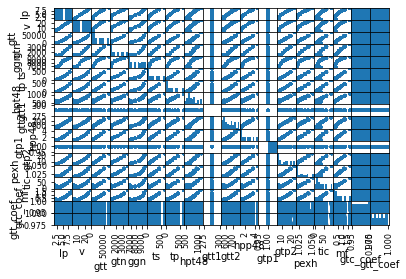

In [44]:
scatter_matrix(naval_prop_data)
plt.show()

In [61]:
X = naval_prop_data[['lp', 'v', 'gtt','gtn','ggn','ts','tp','hpt48','gtt1','gtt2','hpp48','gtp1','gtp2','pexh','tic','mf']]
y = naval_prop_data['gtc_coef']
model = LinearRegression()
model.fit(X, y)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 1.538124277824783
slope: [ 2.61066533e-01 -7.65657612e-02 -5.18451411e-07 -2.98162882e-05
  3.08454373e-05 -5.56089310e-04 -5.56089310e-04  5.58837974e-06
  9.22872889e-16 -3.39841394e-03  1.90057330e-01  5.55111512e-17
  1.38125512e-02  7.47301508e-01 -7.27840722e-04  2.17861082e-01]


In [62]:
y_predicted = model.predict(X)
print(y_predicted)

[0.95883396 0.95511192 0.96064913 ... 1.00512741 0.99854733 1.00156881]


In [63]:
rmse = mean_squared_error(y, y_predicted)
r2 = r2_score(y, y_predicted)

print('Root mean squared error: ', rmse)
print('R2 score: ', r2)

Root mean squared error:  3.4008328197357526e-05
R2 score:  0.8430384852429655


In [64]:
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               gtc_coef   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     4925.
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        12:02:15   Log-Likelihood:                 44460.
No. Observations:               11934   AIC:                        -8.889e+04
Df Residuals:                   11920   BIC:                        -8.879e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lp             0.2611      0.004     62.439      0.0

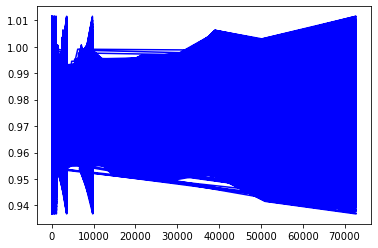

In [65]:
plt.plot(X, y_predicted, color='b')
# plt.plot(x, y, color='b')
plt.show()